In [1]:
# define object names we want to load in
envname='/home/mia/OneDrive/simsrg/env_stim10e-16.0et6.0ph1.0p1.0t0.1plNonebp0.5.pkl'
aname='/home/mia/OneDrive/simsrg/a_stim10e-16.0et6.0ph1.0p1.0t0.1plNonebp0.5.pkl'
alloname = 'variables/loop_stim10evaryet6.0ph1.0p1.0t0.1plNonebp0.5.pkl'

In [2]:
# import stuff
from placerg.funcs import *
from placerg.funcsrg import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from placerg.funcsall import *
import matplotlib

In [3]:
# set up notebook displayt
np.set_printoptions(threshold=5)
alpha=0.4
color='black'
cmap='Greys'
colorline='black'
linethick=3.
colorfit='grey'
plt.style.use('seaborn-paper')
fontsize=30
ticksize=30
markersize=7
alpha=.3
colorfit='gray'
linecolor='black'
palit=['black','firebrick', 'crimson', 'orangered', 'darkorange', 'goldenrod', 'gold', 'khaki']
mycmap = cm.gnuplot
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
# load in objects
allo=load_object(alloname)
env=load_object(envname)
a=load_object(aname)

In [5]:
whc=np.where(np.array(allo.epsilon)==-16./6.)[0][0]

In [6]:
whc

12

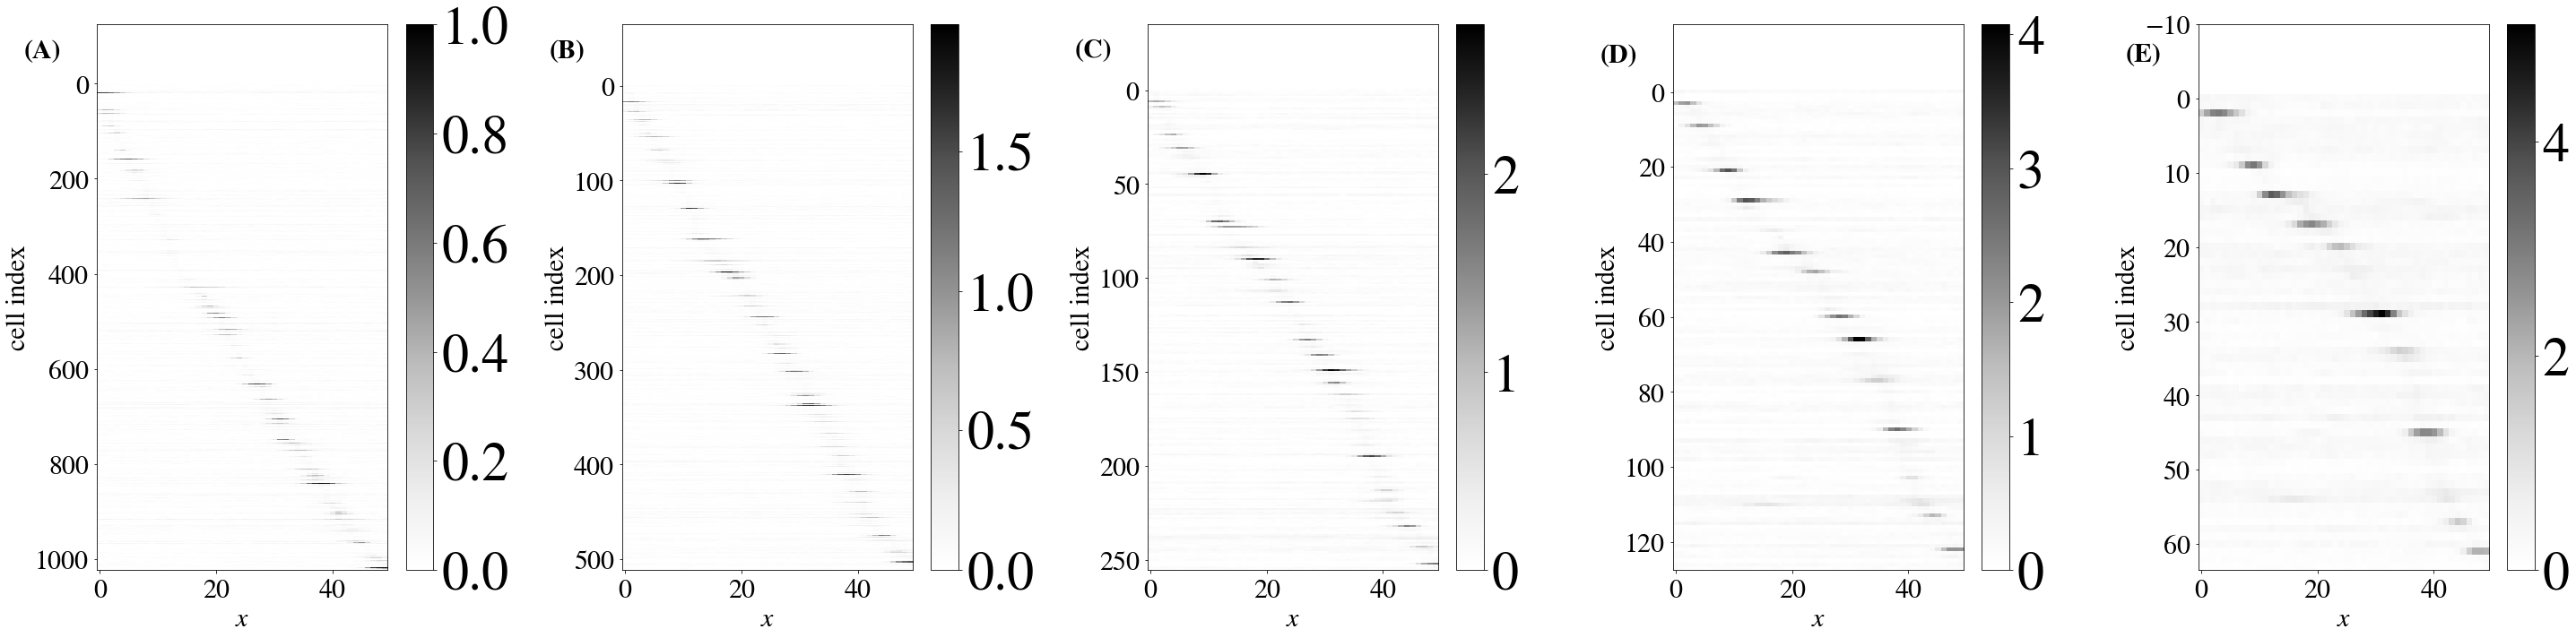

In [10]:
# transpose these and change x axis to track location instead of mean activity
"""
plot average activity of place cells. the average activity is taken over loops run
"""
#mark the place cells:
fig, axs = plt.subplots(1,5, figsize=(40,10))
plt.subplots_adjust(hspace=0.7)
for l in range(0,5):
    mat=a.pmatarr(l)
    mat=np.mean(np.dstack(np.hsplit(mat, 200)), axis=2)
    #finds=findplace(l)
    sort=np.argsort(np.argmax(mat,axis=1))
    pcm=axs[l].imshow(mat[sort, :], cmap=cmap, aspect="auto")
    axs[l].tick_params(axis="y", labelsize=ticksize)
    axs[l].tick_params(axis='x', labelsize=ticksize)
    axs[l].set_xlabel(r'$x$', fontsize=fontsize)
    axs[l].set_ylabel('cell index', fontsize=fontsize)
    cb=fig.colorbar(pcm, ax=axs[l])
    cb.ax.tick_params(labelsize=ticksize) 

axs[0].set_ylim(top=-125)
axs[1].set_ylim(top=-65)
axs[2].set_ylim(top=-35)
axs[3].set_ylim(top=-18)
axs[4].set_ylim(top=-10)

axs[0].text(-13,-55, r'(A)', fontsize=ticksize, weight='bold')
axs[1].text(-13,-30,'(B)',fontsize=ticksize, weight='bold')
axs[2].text(-13,-18,r'(C)', fontsize=ticksize, weight='bold')
axs[3].text(-13,-8,r'(D)', fontsize=ticksize, weight='bold')
axs[4].text(-13,-5, r'(E)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name='variables/sortedpaper.pdf'
plt.savefig(name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


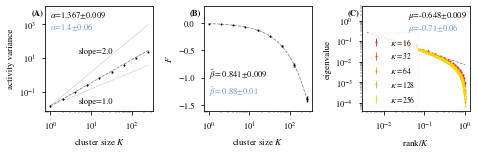

In [70]:
"""
Here plot the eigenvalues from each sucessive RG step, averaged over all clusters and
normalized by cluster size.
"""
c=0
fig, ax = plt.subplots(1,3,figsize=(2*27/8,27/(8*1.5)))
fontsize=9
ticksize=8.5
markersize=2
ylabel= 'activity variance'   
for h in np.array([whc]):
    ax[c].errorbar(allo.varx[h],allo.var[h],  allo.varerr[h], \
                     color='black', marker='o', markersize=markersize, linewidth=.8, linestyle='None')
    popt = allo.alpha[h]
    ax[c].plot(allo.varx[h],linfunc(allo.varx[h], \
                                popt[0], popt[1]), '--', color=colorfit, linewidth=.8,markersize=markersize)
    ax[c].set_xlabel(r'cluster size $K$', fontsize=fontsize)
    ax[c].plot(allo.varx[h], linfunc(allo.varx[h], popt[0], 1.), \
                    color=colorfit, linewidth=.8, alpha=alpha,markersize=markersize)
    ax[c].plot(allo.varx[h], linfunc(allo.varx[h], popt[0], 2.), \
                    color=colorfit, linewidth=.8, alpha=alpha,markersize=markersize)
    ax[c].text(1, 2500, r'${\alpha}$='+ str(np.round(popt[1],3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[h][0], 3)), fontsize=ticksize)
    ax[c].text(1, 500, r'${\alpha}$='+ str(1.4)+r'$\pm$'+\
                   str(0.06), fontsize=ticksize, color='cornflowerblue')
    ax[c].text(5, .02, 'slope=1.0', fontsize=ticksize)
    ax[c].text(5, 20, 'slope=2.0', fontsize=ticksize) 
    ax[c].tick_params(labelsize=ticksize)
    ax[c].set_ylabel(ylabel, fontsize=fontsize)
    ax[c].set_yscale('log')
    ax[c].set_xscale('log')
    ax[c].set_ylim(top=11000)
    ax[c].text(.35, 3500, r'(A)', fontsize=ticksize, weight='bold')
c+=1

ylabel= r'$F$' 
for h in np.array([whc]):
    x=allo.psilx[h]
    y=allo.psil[h]
    popt= allo.beta[h]
    ax[c].errorbar(allo.psilx[h], allo.psil[h],allo.psilerr[h], \
                          color='black', marker='o', linestyle='None', markersize=markersize)
    ax[c].plot(np.arange(np.min(allo.psilx[h]),np.max(allo.psilx[h]), .01),\
                 (probfunc(np.arange(np.min(allo.psilx[h]),np.max(allo.psilx[h]), .01), \
                           popt[0], popt[1])), '--', color=colorfit, linewidth=.8,markersize=markersize)
    ax[c].text(1, -1, r'$\tilde{\beta}=$'+str(np.round(popt[1], 3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[h][0], 3)),fontsize=ticksize)  
    ax[c].text(1, -1.3, r'$\tilde{\beta}=$'+str(0.88)+r'$\pm$'+\
                   str(0.01),fontsize=ticksize, color='cornflowerblue')   
    ax[c].tick_params(labelsize=ticksize)
    ax[c].set_xlabel(r'cluster size $K$', fontsize=fontsize)
    ax[c].set_ylabel(ylabel, fontsize=fontsize)
    ax[c].set_xscale('log')
    ax[c].set_ylim(top=0.3, bottom=-1.6)
    ax[c].text(.35, 0.15, r'(B)', fontsize=ticksize, weight='bold')
c+=1

ylabel= 'eigenvalue'   
for h in np.array([whc]):
    errplot=allo.eigspecerr[h]
    xplot,plot=(allo.eigspecx[h], allo.eigspec[h])
    for m in range(len(xplot)):
        ax[c].errorbar(xplot[m], plot[m], yerr=errplot[m], \
                         label= r'$K=$'+str(2**(m+4)), color=palit[m+2], marker='o', \
                             markersize=markersize, linestyle='None', linewidth=.8)
    ax[c].set_xlabel('rank$/K$', fontsize=fontsize)
    popt=allo.mu[h]
    ax[c].plot(xplot[m],linfunc(xplot[m], \
                                popt[0], popt[1]), '--', color=colorfit, linewidth=.8,markersize=markersize)
    ax[c].tick_params(labelsize=ticksize)
    ax[c].text(.04, 1.45, r'$\mu$='+ str(np.round(popt[1],3))+r'$\pm$'+str(np.round(allo.muerr[h]\
                                                                                            [0], 3)), \
                   fontsize=ticksize)
    ax[c].text(.04, .35, r'$\mu$='+ str(-0.71)+r'$\pm$'+str(0.06), \
                   fontsize=ticksize, color='cornflowerblue')
    ax[c].set_yscale('log')
    ax[c].set_xscale('log')
    ax[c].set_ylim(top=1)
    ax[c].set_ylabel(ylabel, fontsize=fontsize)
    ax[c].legend(fontsize=ticksize-1, loc='lower left')
    ax[c].set_ylim(top=5)
    ax[c].text(.0013, 2, r'(C)', fontsize=ticksize, weight='bold')
plt.tight_layout()
#name='variables/varpaper.eps'
name='variables/fig_1.eps'
plt.savefig(name)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


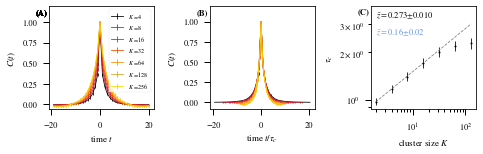

In [71]:
minnm=2
maxxm=256
mrangem=np.abs(minnm-maxxm)
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
fig, ax = plt.subplots(1,3, figsize=(2*27/8,27/(8*1.5)))
ylabel= r'$C(t)$'
c=0   
for h in np.array([whc]):
    for i in range(result[h].shape[0]):
        #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
        ax[c].errorbar((x[h][int(result[h].shape[1]/2)-\
                    20:int(result[h].shape[1]/2)+20]), \
                     (result[h][i, int(result[h].shape[1]/2)-20:int(result[h].\
                        shape[1]/2)+20]),\
                       (plterr[h][i][int(result[h].shape[1]/2)-20:int(result[h]\
                                                             .shape[1]/2)+20]), \
                     label=r'$K$ ='+str(2**(i+2)),color=palit[i],\
                             linewidth=.8,markersize=markersize)
        ax[c].set_xlabel(r'time $t$', fontsize=fontsize)
        #ax[c].text(-18, 1.0, str(allo.labeltype[h])+': '+str(np.round(allo.label[h],2)), \
                               #fontsize=fontsize)
        ax[c].tick_params(labelsize=ticksize)
        ax[c].set_ylim(top=1.19)
        ax[c].tick_params(length=6, width=1, which='major', labelsize=ticksize)
        ax[c].tick_params(length=3, width=1, which='minor', labelsize=ticksize)
        ax[c].legend(fontsize=ticksize-2.5)
        ax[c].text(-26.5, 1.09, '(A)', fontsize=ticksize, weight='bold')
        ax[c].set_ylabel(ylabel, fontsize=fontsize)
c+=1

minnm=2
maxxm=256
mrangem=np.abs(minnm-maxxm)
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
ylabel= r'$C(t)$'
for h in np.array([whc]):
    for i in range(result[h].shape[0]):
        #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
        ax[c].errorbar((x[h][int(result[h].shape[1]/2)-\
                     20:int(result[h].shape[1]/2)+20])/allo.tau[h][i], \
                     (result[h][i, int(result[h].shape[1]/2)-20:int(result[h].\
                        shape[1]/2)+20]),\
                       (plterr[h][i][int(result[h].shape[1]/2)-20:int(result[h]\
                                                            .shape[1]/2)+20]), \
                           label=r'$K$ ='+str(2**(i+2)),  color=palit[i],\
                             linewidth=.8,markersize=markersize)
    ax[c].set_xlabel(r'time $t/\tau_c$', fontsize=fontsize)
    ax[c].tick_params(labelsize=ticksize)
    ax[c].set_ylim(top=1.19)
    ax[c].tick_params(length=6, width=1, which='major', labelsize=ticksize)
    ax[c].tick_params(length=3, width=1, which='minor', labelsize=ticksize)
    ax[c].text(-27, 1.09, '(B)', fontsize=ticksize, weight='bold')
    ax[c].set_ylabel(ylabel, fontsize=fontsize)
c+=1
ylabel= r'$\tau_c$' 
for h in np.array([whc]):
    ax[c].errorbar(2**np.arange(1,8),allo.tau[h],allo.tauerr[h], color=colorline, \
              label='taus', marker='o',linestyle='None', markersize=markersize, elinewidth = .8)
    popt= allo.z[h]
    ax[c].plot(2**np.arange(1,8), linfunc(2**np.arange(1,8), \
                                    popt[0], popt[1]), '--', label='fit', \
               color=colorfit, linewidth=.8)
    ax[c].set_xlabel(r'cluster size $K$', fontsize=fontsize)
    ax[c].tick_params(labelsize=ticksize)
    ax[c].text(2, 3.3, r'$\tilde{z}=$'+str(round(popt[1],3))+r'$\pm$'+\
                   str(np.format_float_positional(allo.zerr[h][0], unique=False, precision=3)), fontsize=ticksize)
    ax[c].text(2, 2.6, r'$\tilde{z}=$'+str(0.16)+r'$\pm$'+\
                   str(0.02), fontsize=ticksize, color='cornflowerblue')
    ax[c].set_yscale('log')
    ax[c].set_xscale('log')
    ax[c].set_ylim(top=3.9)
    ax[c].tick_params(length=6, width=1, which='major', labelsize=ticksize)
    ax[c].tick_params(length=3, width=1, which='minor', labelsize=ticksize)
    ax[c].text(0.9,3.5, '(C)', fontsize=ticksize, weight='bold') 
    ax[c].set_ylabel(ylabel, fontsize=fontsize)
c+=1
plt.tight_layout()
name='variables/fig_2.eps'
plt.savefig(name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

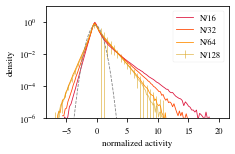

In [72]:
minnm=16
maxxm=128
mrangem=np.abs(minnm-maxxm)
x=allo.actmomx
plott=allo.actmom
plterr=allo.actmomerr
fig, ax = plt.subplots(1,1, figsize=(27/8,27/(8*1.5)))
ylabel= r'density'

c=0   
for h in np.array([whc]):
    for i in (np.arange(len(allo.actmomx[0]))):
        if i==3:
            ax.errorbar(x[h][i],plott[h][i], plterr[h][i], \
                              label='N/'+str(2**(i+4)), \
                          color=palit[i+2], linewidth=.8, errorevery=3, alpha=.7)
            popt, pcov = curve_fit(gaussian,x[h][i], plott[h][i])
            ax.plot(np.arange(-4, 4,.1), \
                    gaussian(np.arange(-4, 4, .1),\
                    popt[0], popt[1]), '--', color=colorfit, linewidth=.8)
        else:
            ax.plot(x[h][i],plott[h][i],  \
                              label='N/'+str(2**(i+4)), \
                          color=palit[i+2], linewidth=.8)
    ax.tick_params(labelsize=ticksize)
    ax.set_xlabel('normalized activity', fontsize=fontsize)
    ax.set_yscale('log')
    ax.set_ylim(bottom=10**-6, top=9)
    ax.set_ylabel(ylabel, fontsize=fontsize)
plt.legend(fontsize=ticksize)
plt.tight_layout()
name='variables/fig_3.eps'
plt.savefig(name)

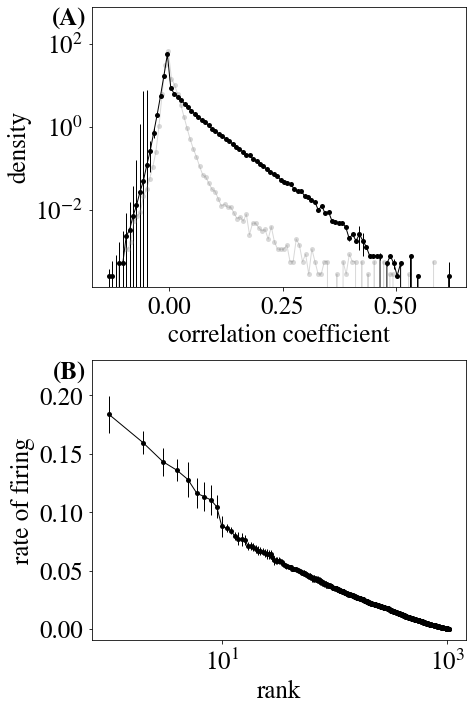

In [23]:
fig, ax = plt.subplots(2,1, figsize=(20/(3),5*2))
ax[0].errorbar(allo.coeffx[whc], allo.coeff[whc], allo.coefferr[whc], marker='o', color='black',\
               markersize=5,linewidth=1)
ax[0].plot(allo.shuffcoeffx[whc], allo.shuffcoeff[whc], '-o', color=colorfit, alpha=alpha,\
               markersize=5,linewidth=1)
ax[0].set_xlabel('correlation coefficient', fontsize=fontsize-5)
ax[0].set_ylabel('density', fontsize=fontsize-5)
ax[0].tick_params(labelsize=ticksize-5)
ax[0].set_yscale('log')
ax[0].set_ylim(top=800)
ax[0].text(-.26, 300, '(A)', fontsize=ticksize-5, weight='bold')
ax[1].errorbar(allo.ratex[whc]*1024,allo.rate[whc], allo.rateerr[whc], color=color, marker='o', markersize=5,\
              linewidth=1)

ax[1].set_xscale('log')
ax[1].set_xlabel('rank', fontsize=fontsize-5)
ax[1].set_ylabel('rate of firing', fontsize=fontsize-5)
ax[1].tick_params(labelsize=ticksize-5)
ax[1].set_ylim(top=0.23)
ax[1].text(.32, .215, '(B)', fontsize=ticksize-5, weight='bold')

plt.tight_layout()
name='variables/supppaper.pdf'
plt.savefig(name)